In [4]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [25]:
#read the dataset
train=pd.read_csv('train.csv')

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\HP'

In [33]:
count=0
for i in train.isnull():
  count=0
  for j in train.isnull()[i]:
    if j:
        count=count+1
  print(i,count)

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


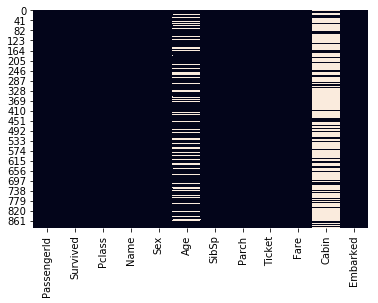

In [36]:
sns.heatmap(train.isnull(),cbar=False)

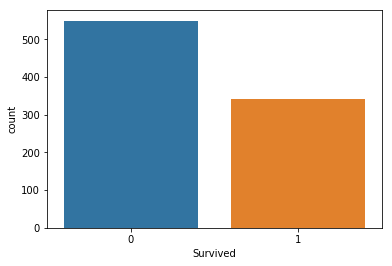

In [37]:
sns.countplot(x='Survived',data=train)

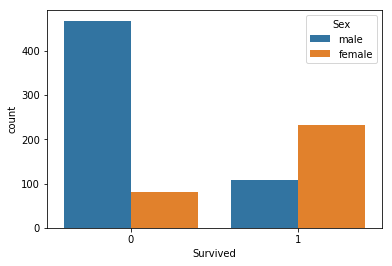

In [57]:
sns.countplot(x='Survived',hue='Sex',data=train)

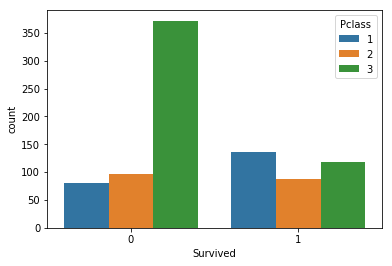

In [43]:
sns.countplot(x='Survived',hue='Pclass',data=train)

C:\Users\HP\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


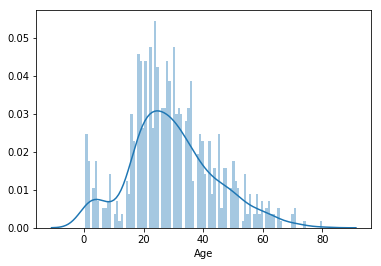

In [60]:
#use of bins and dropna
sns.distplot(train['Age'].dropna(),kde = True,bins = 100)

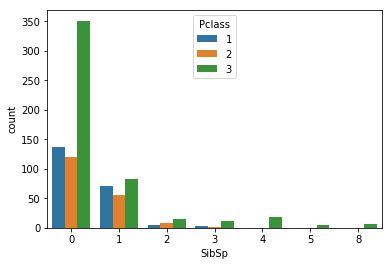

In [61]:
sns.countplot(x ='SibSp',data = train,hue='Pclass')

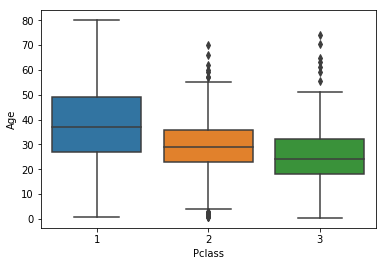

In [63]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [71]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
           return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
     return Age
        

In [ ]:
#to apply the changes
train['Age']=train[['Age','Pclass']].apply(impute_age,axis = 1)

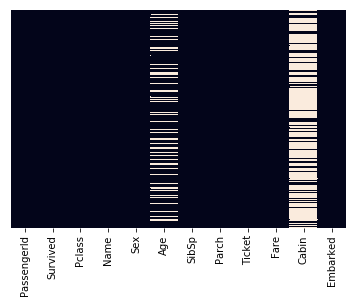

In [78]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False)

In [80]:
#inplace for not showing it here
train.drop('Cabin',axis=1,inplace=True)